# Basics of Hypothesis Testing

Learn about hypothesis testing by simulating a one-sample t-test.
What is Hypothesis Testing?
A framework for asking questions about data and answering them with probabilities. Different tests address different questions and data types.
Example Context
Population: IBDP exam scores, mean ≈ 29.92 (May 2020).
Sample: 100 students in a prep program, mean = 31.16.

Question: Is this improvement real or due to random chance?

Step 1: Ask a Question
The International Baccalaureate Degree Programme (IBDP) is a world-wide educational program. Each year, students in participating schools can take a standardized assessment to earn their degree. Total scores on this assessment range from 1-45. Based on data provided here, the average total score for all students who took this exam in May 2020 was around 29.92. The distribution of scores looks something like this:Formulate a measurable question — not just “are they better?” but whether the difference is statistically large enough to suggest a true effect.
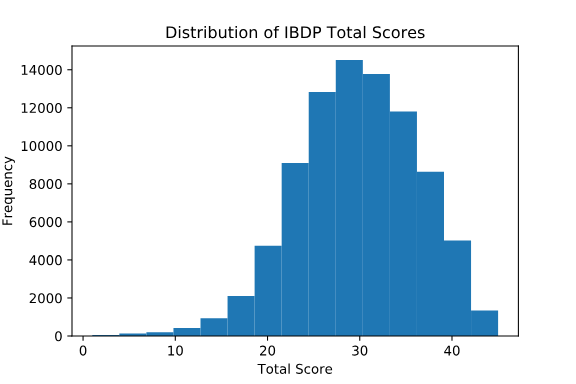
Imagine a hypothetical online school, Statistics Academy, that offers a 5-week test-preparation program. Suppose that 100 students who took the IBDP assessment in May 2020 were randomly chosen to participate in the first group of this program and that these 100 students earned an average score of 31.16 points on the exam — about 1.24 points higher than the international average! Are these students really outperforming their peers? Or could this difference be attributed to random chance?

Step 2: Define Hypotheses
- Null Hypothesis (H₀): Sample comes from the population with mean = 29.92. Any difference is due to chance.
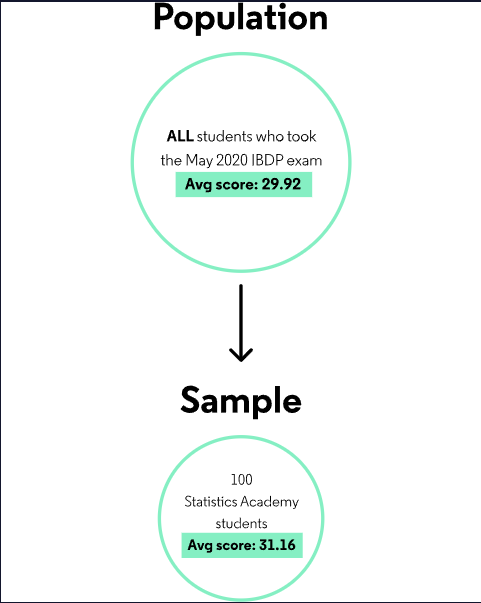
- Alternative Hypothesis (H₁): Sample comes from a different population with a mean ≠ 29.92.
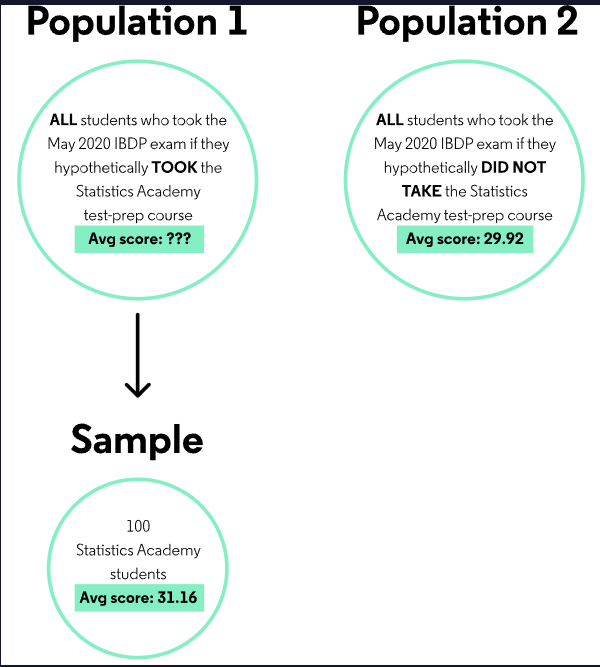
Alternatives can be: greater than, less than, or not equal to.

Step 3: Null Distribution
Simulate or estimate the distribution of sample means under the null. This is usually normal, centered at the population mean.

Step 4: Calculate P-Value
The p-value is the probability of observing a sample mean as extreme (or more extreme) than the one collected, assuming the null is true.
- One-sided test: probability in one tail (greater or less). > if the null hypothesis is true (population mean = 29.92), what is the likelihood of having a sample mean of (sample mean - populaton mean) units higher (or lower) than the population mean?  
- Two-sided test: probability in both tails (different than). > > if the null hypothesis is true (population mean = 29.92), what is the likelihood of having a sample mean of (sample mean - populaton mean) units higher than AND lower than the population mean?

Step 5: Interpret Results
Small p-value → observed result is unlikely under the null, suggesting evidence for the alternative.
Large p-value → observed result is consistent with the null.
Significance thresholds (often 0.05) are used to decide whether to reject H₀.

Example Interpretation
If p = 0.031 and α = 0.05, we reject H₀ and conclude the prep program students performed significantly better. If the same data were tested two-sided, p = 0.062, so H₀ would not be rejected.

#  One-Sample T-Tests in SciPy

## Introduction
A one-sample t-test is a statistical test used to compare the mean of a sample against a known or hypothesized population mean. It helps determine whether the difference between the sample mean and the population mean is likely due to chance or reflects a real effect. Typical questions include checking if website visit times differ from a target value, or if customer spending is greater than a set benchmark.

In the example of BuyPie, the company expects the average online order to be around 1000 Rupees. A recent sample of 50 orders shows an average below this target. The one-sample t-test provides a way to decide whether this observed difference is meaningful (suggesting customers truly spend less) or simply the result of random variation in a limited sample.

In [1]:
import numpy as np

# Load the dataset containing customer purchase prices
prices = np.genfromtxt("prices.csv")

In [2]:
# Step 1: Print the raw values to inspect variation in purchases
print("Prices data:", prices)

# Step 2: Calculate the mean purchase price across all 50 customers
prices_mean = prices.mean()
print("Average purchase price:", prices_mean)

Prices data: [ 978. 1080.  999.  855. 1105.  961.  899. 1061.  880. 1455.  505.  936.
 1024.  982.  840.  930.  829.  504.  955. 1380. 1361. 1130.  946.  973.
 1076. 1131.  810.  734. 1275.  867.  962.  865.  709. 1216.  735.  768.
  757. 1060.  715.  839.  999. 1259. 1194. 1082. 1129. 1255.  931. 1236.
  921.  907.]
Average purchase price: 980.0


## Implementing a One-Sample T-Test
A one-sample t-test checks whether the mean of a sample is significantly different from a hypothesized population mean. In the BuyPie example, the null hypothesis states that the true average order cost is 1000 Rupees, while the alternative states that it is not 1000. Using SciPy’s ttest_1samp(), we provide the list of 50 observed prices and the hypothesized mean of 1000. The function calculates the t-statistic (which measures how far the sample mean is from 1000 in standardized units) and the corresponding p-value (the probability of observing such a sample if the null hypothesis is true). A low p-value suggests the observed mean of 980 Rupees is unlikely under the null, indicating that customers may really be spending less than expected.

In [4]:
from scipy.stats import ttest_1samp

In [5]:
# Load the dataset with purchase prices
prices = np.genfromtxt("prices.csv")

# Run a one-sample t-test against the expected mean of 1000 Rupees
tval, pval = ttest_1samp(prices, 1000)

# Print the p-value
print("P-value from one-sample t-test:", pval)

P-value from one-sample t-test: 0.4920744804182786


## Assumptions of a One Sample T-Test
When using a one-sample t-test, it’s critical to check whether the assumptions of the test are satisfied. The sample should be randomly selected from the population, since a biased subset could lead to misleading conclusions. The observations must also be independent of each other, meaning that one data point should not influence another. Finally, the data should either follow a roughly normal distribution without strong outliers, or the sample size should be large enough (commonly n ≥ 40) for the Central Limit Theorem to apply. For smaller samples, plotting the data to check for skew, multiple peaks, or outliers is important, as these patterns may invalidate the test. If any of the assumptions are questionable, the test can still be run, but the results should be reported along with the limitations.

In [6]:
import matplotlib.pyplot as plt

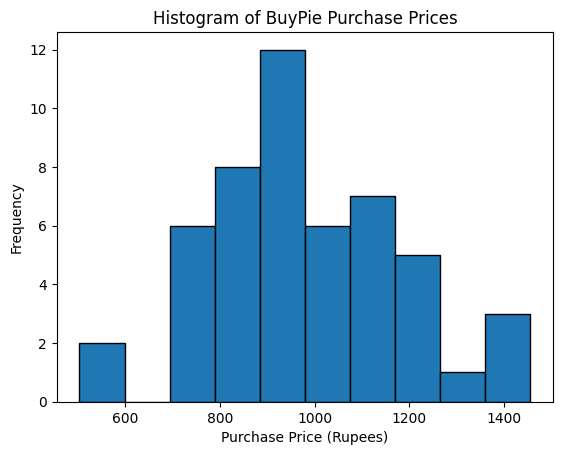

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
prices = np.genfromtxt("prices.csv")

# Step 1: Plot histogram of purchase prices
plt.hist(prices, bins=10, edgecolor='black')
plt.title("Histogram of BuyPie Purchase Prices")
plt.xlabel("Purchase Price (Rupees)")
plt.ylabel("Frequency")
plt.show()


# Simulating a Binomial Test

## Introduction
A binomial hypothesis test is used when the data represents binary outcomes, like success/failure or yes/no, and we want to compare the observed frequency of successes to an expected probability. For example, if 90% of passengers are expected to show up but only 80 out of 100 actually do, the test checks whether this difference is statistically meaningful or just random variation.
It is conceptually similar to the one-sample t-test, but the focus is different: binomial tests apply to categorical proportions, while one-sample t-tests apply to quantitative means. In Python, libraries like SciPy provide ready-made functions to run these tests, but understanding the logic behind them—how sample outcomes are compared against expected probabilities—ensures results are interpreted correctly and mistakes are avoided.

In [8]:
import pandas as pd

In [10]:
import pandas as pd

# Load the dataset with customer activity from Live-it-LIVE.com
monthly_report = pd.read_csv('monthly_report.csv')

# Step 1: Print the DataFrame to inspect its structure
print(monthly_report)

# Tip:
# - The 'purchase' column indicates whether a purchase was made.
# - The 'item' column lists which item was purchased (if any).
# Scrolling through the output will help you check variation in purchases and items.


               timestamp purchase                       item
0    2020-01-17 17:23:06        y  cue cards - love actually
1    2020-01-25 17:09:39        n                        NaN
2    2020-01-25 05:22:01        n                        NaN
3    2020-01-18 04:33:40        y      t-rex - jurassic park
4    2020-01-24 17:24:52        n                        NaN
..                   ...      ...                        ...
495  2020-01-16 08:40:02        n                        NaN
496  2020-01-09 21:11:19        n                        NaN
497  2020-01-31 08:54:51        n                        NaN
498  2020-01-21 19:35:03        n                        NaN
499  2020-01-31 09:48:43        n                        NaN

[500 rows x 3 columns]


## Summarizing the Sample
The company expects around 10% of visitors to make a purchase during this season. A bug in the checkout page raised concerns that the purchase rate may have fallen below this benchmark, so the goal is to investigate whether the observed data supports that suspicion. Each row in the dataset represents a visitor, with a column indicating whether they made a purchase. To prepare for a binomial hypothesis test, the first step is to calculate two key numbers: the total number of visitors, given by the number of rows in the dataset, and the total number of purchases, obtained by counting rows where a purchase occurred. These values provide the basis for comparing the observed purchase rate with the expected 10% rate.


In [11]:
import numpy as np

In [12]:
# Step 1: Preview the dataset
# .head() shows the first 5 rows so we can inspect how the 'purchase' column is coded
print(monthly_report.head())

# Step 2: Calculate sample size
# The total number of visitors is equal to the number of rows in the dataset
sample_size = len(monthly_report)
print("Total visitors (sample size):", sample_size)

# Step 3: Calculate number of purchases
# We check how many rows have 'purchase' marked as "y" (yes) and sum them up
num_purchased = np.sum(monthly_report["purchase"] == "y")
print("Number of purchases:", num_purchased)

             timestamp purchase                       item
0  2020-01-17 17:23:06        y  cue cards - love actually
1  2020-01-25 17:09:39        n                        NaN
2  2020-01-25 05:22:01        n                        NaN
3  2020-01-18 04:33:40        y      t-rex - jurassic park
4  2020-01-24 17:24:52        n                        NaN
Total visitors (sample size): 500
Number of purchases: 41


## Simulating Randomness
The difference between the expected 50 purchases and the observed 41 can be explained by randomness — even if every visitor truly had a 10% chance of buying, the exact number won’t always hit 10%. A useful analogy is flipping a coin. With a fair coin, the probability of heads is 50%, but if you flip it 10 times you won’t always get exactly five heads. In Python, this randomness is demonstrated with `np.random.choice()`, which draws outcomes based on specified probabilities. For a single flip, `np.random.choice(['heads','tails'], size=1, p=[0.5,0.5])` gives either heads or tails. Expanding `size` to 10 simulates 10 flips at once, producing a mix of heads and tails. The result shows how chance alone can produce outcomes above or below expectation, just like the purchase counts at Live-it-LIVE.

In [13]:
# Step 1: Simulate one visitor to Live-it-LIVE
# 'y' = purchase, 'n' = no purchase
# Each visitor has a 10% chance to purchase (p=0.1) and 90% chance not to purchase (p=0.9)
one_visitor = np.random.choice(["y", "n"], size=1, p=[0.1, 0.9])
print("One simulated visitor:", one_visitor)

# Step 2: Simulate an entire month of visitors (500 visitors total)
# Each of the 500 outcomes is independently drawn with the same probabilities
simulated_monthly_visitors = np.random.choice(["y", "n"], size=500, p=[0.1, 0.9])
print("Simulated monthly visitors (first 50 shown):", simulated_monthly_visitors[:50])
# Note: Printing only first 50 makes it easier to inspect results


One simulated visitor: ['n']
Simulated monthly visitors (first 50 shown): ['n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y'
 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n'
 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'y' 'n' 'n' 'n' 'n' 'y' 'n']


## Simulating the Null Distribution I
The null hypothesis for Live-it-LIVE assumes that the true purchase probability is 10%, and the observed 41 purchases out of 500 visitors is simply a result of random variation. To understand this idea, the coin flip analogy helps: if we flip a fair coin 10 times, the expected number of heads is five, but random chance will often give four, six, or other nearby results. In Python, we can simulate this with `np.random.choice()` to draw ten flips and then use `np.sum()` to count the heads. Running the simulation multiple times shows that while most results cluster around the expectation, more extreme outcomes (like all heads or none) are still possible, though much less likely. This illustrates why observing 41 instead of 50 purchases doesn’t immediately prove a change in probability — it may still fall within the range of chance outcomes under the null hypothesis.


In [14]:
# Step 1: Simulate 500 visitors
# Each visitor has a 10% chance ("y") of making a purchase and 90% chance ("n") of not purchasing
simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])

# Step 2: Count the number of purchases
# Compare each outcome to "y" and sum the True values → total simulated buyers
num_purchased = np.sum(simulated_monthly_visitors == "y")

# Step 3: Print the result
# This number should hover around 50, but can be a bit higher or lower due to random variation
print("Number of simulated purchases:", num_purchased)


Number of simulated purchases: 62


## Simulating the Null Distribution II
When simulating random experiments many times, we see how outcomes vary by chance. With a fair coin flipped 10 times, the expected number of heads is five, but repeated simulations show a spread around that value. Running 10,000 simulated trials demonstrates the full range: sometimes no heads appear, sometimes all 10, but most outcomes cluster near the middle. In code, this is done by looping through many replications, flipping coins, counting heads with `np.sum()`, and saving results in a list. Using `np.min()` and `np.max()`, we confirm that the observed counts range from 0 to 10. This illustrates the natural variability in sampling — even with fixed probabilities, repeated trials do not yield identical results, but rather a distribution of possible outcomes.


In [15]:
# Step 1: Initialize a list to store purchase counts from each simulation
null_outcomes = []

# Step 2: Run 10,000 simulations of 500 visitors
for i in range(10000):
    # Simulate 500 visitors, each with a 10% chance of purchase ("y") and 90% chance of no purchase ("n")
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
    
    # Count how many of those 500 visitors made a purchase
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    
    # Append the result to our list of outcomes
    null_outcomes.append(num_purchased)

# Step 3: Find the smallest and largest number of purchases across the 10,000 simulations
null_min = np.min(null_outcomes)
null_max = np.max(null_outcomes)

# Step 4: Print results
print("Minimum purchases observed in simulation:", null_min)
print("Maximum purchases observed in simulation:", null_max)


Minimum purchases observed in simulation: 26
Maximum purchases observed in simulation: 76


## Inspecting the Null Distribution
When we run many simulations of a random process, a histogram helps us see not only the range of possible outcomes but also which outcomes are more common. In the coin flip example, flipping a fair coin 10 times and repeating that experiment 10,000 times produces results from 0 to 10 heads. A histogram of these results shows most outcomes clustering around 4–6 heads, while extremes like 0 or 10 are rare. Using `plt.hist()` displays the frequency distribution, and `plt.axvline()` lets us mark a reference point (such as 2 heads) to highlight how unusual that outcome is. The same logic applies to the Live-it-LIVE purchase simulations: while totals between about 25 and 75 purchases are possible, the histogram reveals where the bulk of outcomes lie and how extreme a particular observation is compared to the null distribution.


In [16]:
import matplotlib.pyplot as plt

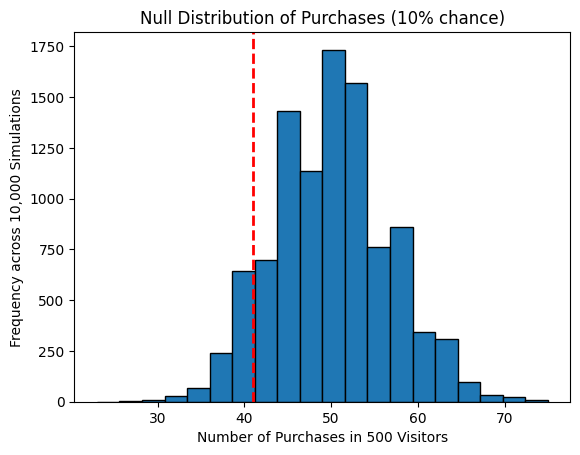

In [17]:
# Step 1: Simulate 10,000 months of 500 visitors each
null_outcomes = []
for i in range(10000):
    # Each visitor has a 10% chance to purchase ("y"), 90% chance not to purchase ("n")
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
    
    # Count the number of purchases in this simulated month
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    
    # Save this outcome
    null_outcomes.append(num_purchased)

# Step 2: Plot histogram of null distribution
# This shows how many purchases we typically see under the null hypothesis (p=0.1)
plt.hist(null_outcomes, bins=20, edgecolor='black')

# Step 3: Add a red vertical line at 41 (the observed number of purchases this month)
plt.axvline(41, color='r', linestyle='dashed', linewidth=2)

# Step 4: Show the plot
plt.title("Null Distribution of Purchases (10% chance)")
plt.xlabel("Number of Purchases in 500 Visitors")
plt.ylabel("Frequency across 10,000 Simulations")
plt.show()

## Confidence Intervals
When analyzing the null distribution, it’s more informative to describe the central bulk of outcomes rather than the full range, since extreme values are rare. A common approach is to report the interval covering 95% of the simulated values. Using `np.percentile(outcomes, [2.5, 97.5])`, we find the cutoff points so that only 5% of results lie outside this range, split evenly between the lower and upper tails. In the purchase example, the 95% interval is about 37 to 63 purchases out of 500 visitors, assuming a true 10% purchase rate. Because the observed value of 41 lies inside this interval, it is still consistent with the null hypothesis — meaning the lower purchase count could reasonably have occurred by random chance, and there isn’t strong evidence to suggest a real drop in the purchase probability.


In [18]:
null_outcomes = []

# Step 1: Simulate 10,000 samples under the null hypothesis
for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    null_outcomes.append(num_purchased)

# Step 2: Calculate the 90% confidence interval
# The 5th and 95th percentiles leave 5% in each tail, covering the middle 90% of outcomes
null_90CI = np.percentile(null_outcomes, [5, 95])
print("90% Confidence Interval for purchases under H0:", null_90CI)

# Step 3: Check if observed value 41 is inside this interval
observed = 41
if observed < null_90CI[0] or observed > null_90CI[1]:
    print(f"Observed value {observed} is OUTSIDE the 90% interval → less likely under the null.")
else:
    print(f"Observed value {observed} is INSIDE the 90% interval → consistent with the null.")


90% Confidence Interval for purchases under H0: [39. 61.]
Observed value 41 is INSIDE the 90% interval → consistent with the null.


## Calculating a One-Sided P-Value
The interpretation of a p-value depends on the alternative hypothesis we set. In the coin flip example, if the null hypothesis assumes a fair coin with a 50% chance of heads, and the alternative claims the true probability is less than 0.5, then observing only 2 heads out of 10 becomes our test statistic. To evaluate how unusual this outcome is under the null, we simulate many sets of 10 flips, count the heads in each, and then calculate the proportion of simulations where the count was 2 or fewer. That fraction represents the one-sided p-value. In this case, about 5.9% of the simulated experiments fell in that range, so the p-value is 0.059. This means that if the coin were truly fair, there is roughly a 5.9% chance of observing such an extreme result (two or fewer heads) purely by chance.


In [19]:
import numpy as np

null_outcomes = []

# Step 1: Simulate 10,000 months under the null hypothesis
for i in range(10000):
    # Each of the 500 visitors has a 10% chance of purchase ("y")
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
    
    # Count how many purchases occurred in this simulated month
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    
    # Save the outcome
    null_outcomes.append(num_purchased)

# Step 2: Convert to NumPy array for easier calculations
outcomes = np.array(null_outcomes)

# Step 3: Calculate the one-sided p-value
# Proportion of simulations where purchases were <= observed 41
p_value = np.sum(outcomes <= 41) / len(null_outcomes)
print("Estimated p-value:", p_value)


Estimated p-value: 0.1006


## Calculating a Two-Sided P-Value
A two-sided hypothesis test considers deviations from the expected value in both directions, rather than only one. In the coin flip example, with 10 flips and an expected 5 heads under the null, observing 2 heads is 3 below expectation. A two-sided test also accounts for results 3 above expectation — 8 or more heads. To calculate the p-value, we simulate many samples, then count the proportion of outcomes that are either at most 2 or at least 8 heads. In Python, this is done with a logical “or” condition, combining both tails of the null distribution. The result is about 0.12, which is roughly double the one-sided p-value of 0.059. This illustrates how two-sided tests broaden the rejection region to include extreme results on either side, making the p-value larger and the test more conservative.


In [20]:
null_outcomes = []

# Step 1: Simulate 10,000 months of 500 visitors under H0 (10% purchase rate)
for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    null_outcomes.append(num_purchased)

# Step 2: Convert list to NumPy array for vectorized calculations
outcomes = np.array(null_outcomes)

# Step 3: Calculate the two-sided p-value
# Compare observed deviation from expected (50 ± 9) → count outcomes <= 41 or >= 59
p_value = np.sum((outcomes <= 41) | (outcomes >= 59)) / len(outcomes)

# Step 4: Print result
print("Estimated two-sided p-value:", p_value)


Estimated two-sided p-value: 0.2014


## Writing a Binomial Test Function
The goal is to turn the simulation logic we’ve been using into a general function. Instead of hardcoding the Live-it-LIVE values, the function will accept three inputs: the observed number of successes, the total sample size, and the null hypothesis probability of success. Inside the function, many samples are simulated under the null by drawing from a binomial process, and the number of successes in each is recorded. The one-sided p-value is then calculated as the proportion of simulated outcomes less than or equal to the observed statistic. This setup corresponds to an alternative hypothesis that the true success probability is smaller than the null. The function essentially automates the entire workflow, letting us quickly test any observed dataset against a hypothesized probability using simulation.

In [28]:
from scipy.stats import binomtest

In [30]:
def simulation_binomial_test(observed_successes, n, p):
    # Step 1: Initialize a list to store simulated outcomes
    null_outcomes = []
  
    # Step 2: Generate simulated null distribution
    # Repeat 10,000 times: simulate n visitors, each with probability p of "y"
    for i in range(10000):
        simulated_monthly_visitors = np.random.choice(['y', 'n'], size=n, p=[p, 1-p])
        
        # Count the number of successes ("y") in this simulation
        num_purchased = np.sum(simulated_monthly_visitors == 'y')
        
        # Append result to the list of outcomes
        null_outcomes.append(num_purchased)

    # Step 3: Convert to NumPy array for vectorized operations
    null_outcomes = np.array(null_outcomes)
  
    # Step 4: Calculate one-sided p-value
    # Proportion of simulations where the number of successes ≤ observed
    p_value = np.sum(null_outcomes <= observed_successes) / len(null_outcomes) 
  
    # Step 5: Return the estimated p-value
    return p_value

# --- Test your function ---
# Example: observed 45 purchases, 500 visitors, null prob = 0.1
p_value1 = simulation_binomial_test(45, 500, 0.1)
print("Simulation-based p-value:", p_value1)

# Compare with SciPy’s exact binomial test
p_value2 = binomtest(45, 500, 0.1, alternative='less').pvalue
print("SciPy binom_test p-value:", p_value2)

Simulation-based p-value: 0.2507
SciPy binom_test p-value: 0.254689260562342


## Binomial Testing with SciPy
The binomial distribution models the number of successes in a fixed number of trials, each with the same probability of success. In the Live-it-LIVE example, each visitor is a trial with a 10% chance of purchase, and the observed 41 purchases out of 500 can be compared to this expectation. Instead of simulating the distribution, we can use SciPy’s built-in `binom_test()` function, which calculates exact p-values. By default, it performs a two-sided test, but the `alternative` argument lets us specify one-sided tests, such as `alternative="less"`. The function takes three arguments: the number of observed successes, the total number of trials, and the null probability of success. For example, testing whether a coin is fair after observing 2 heads in 10 flips is done with `binom_test(2, n=10, p=0.5)`, which returns a p-value of 0.109. This means that if the coin were fair, there’s about a 10.9% chance of seeing an outcome at least this extreme in either direction, making the result not strong evidence against fairness.


In [33]:
# Step 1: Two-sided binomial test
# Null: true purchase rate = 10%
# Alt: purchase rate ≠ 10%
p_value_2sided = binomtest(41, n=500, p=0.1, alternative="two-sided").pvalue
print("Two-sided p-value:", p_value_2sided)

# Step 2: One-sided binomial test
# Null: true purchase rate = 10%
# Alt: purchase rate < 10%
p_value_1sided = binomtest(41, n=500, p=0.1, alternative="less").pvalue
print("One-sided p-value:", p_value_1sided)

Two-sided p-value: 0.20456397700682577
One-sided p-value: 0.10011352697567102


# Significance Thresholds

## Introduction to Significance Thresholds
When interpreting hypothesis test results, sometimes it’s enough to report the p-value or a confidence interval and describe what it means. In other cases, especially when a clear decision is needed, we compare the p-value to a chosen significance threshold (often 0.05). If the p-value is below this threshold, we say the result is “significant” and reject the null hypothesis; if not, we consider it “not significant” and fail to reject the null.
For example, if a quiz question is intended to have a 70% success rate but only 60 out of 100 learners answered correctly, we can test whether this difference is significant. If the resulting p-value is small (below 0.05), we’d conclude the success rate really is different from 70% and decide to rewrite the question. If the p-value is larger, the observed result could reasonably be due to chance, so we’d keep the question. This approach transforms statistical evidence into a practical yes/no decision framework.


In the quiz question scenario, the null hypothesis assumes learners have a 70% chance of answering correctly, while the alternative says the true probability is different from 70%. After running a binomial test, we compare the resulting p-value to our chosen significance threshold, here set at 0.05. If the p-value is below 0.05, the result is considered significant — meaning the observed performance is unlikely under the null, so we reject it and decide to rewrite the question. If the p-value is above 0.05, the difference could reasonably be explained by chance, so we fail to reject the null and keep the question as is. This shows how p-values, when combined with a significance threshold, guide clear decision-making.

## Error types
When we use a significance threshold in hypothesis testing, we always run the risk of making mistakes. These errors occur because we’re drawing conclusions from a sample rather than observing the entire population. There are two main types:
- Type I Error (false positive): Rejecting the null hypothesis when it is actually true.
- Type II Error (false negative): Failing to reject the null hypothesis when it is actually false.
The outcomes can be summarized in the table below:
N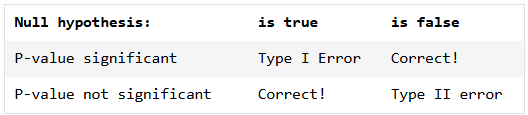

Example (Quiz Question):
If the true probability of a learner answering correctly is 70% (null is true) but our test result is significant, we make a Type I Error by removing the question unnecessarily.

If the true probability is not 70% (null is false) but our test result is not significant, we make a Type II Error by keeping a flawed question.
This trade-off between the two error types is fundamental in hypothesis testing, and the choice of significance threshold (often 0.05) affects the balance between them.

## Setting the Type I Error Rate
The significance threshold we choose in a hypothesis test directly determines the probability of making a Type I Error. By definition, a Type I Error occurs when the null hypothesis is true but we still find a significant p-value and reject it incorrectly.
In the quiz question example, the null hypothesis states that the probability of answering correctly is 70%. A simulation can demonstrate the link between the significance threshold and the false positive rate. We repeatedly simulate 100 learners, each with a 70% chance of answering correctly. Since this setup assumes the null is true, any significant p-value we observe corresponds to a Type I Error. Running this process 1000 times shows that about 5% of the tests incorrectly reject the null when using a threshold of 0.05.
This confirms an important property: the significance threshold is equal to the expected rate of Type I Errors. Choosing a lower threshold reduces the chance of false positives but makes it harder to detect real effects, while a higher threshold increases false positives but makes the test more sensitive.


In [34]:
# Step 1: Initialize counter for false positives
false_positives = 0

# Step 2: Set the significance threshold (Type I error rate we allow)
sig_threshold = 0.01

# Step 3: Run 1000 simulations
for i in range(1000):
    # Simulate 100 learners, each with 80% chance of answering correctly
    sim_sample = np.random.choice(['correct', 'incorrect'], size=100, p=[0.8, 0.2])
    
    # Count how many answered correctly in this simulated sample
    num_correct = np.sum(sim_sample == 'correct')
    
    # Run a binomial test where null = true probability of 0.8
    p_val = binomtest(num_correct, 100, 0.8).pvalue
    
    # If p-value is below threshold, we incorrectly reject → Type I error
    if p_val < sig_threshold:
        false_positives += 1

# Step 4: Print the proportion of simulations that were false positives
print("Proportion of Type I errors:", false_positives / 1000)


Proportion of Type I errors: 0.01


## Problems with Multiple Hypothesis Tests
When we run many hypothesis tests in the same study, the risk of false positives increases because each test carries its own chance of a Type I Error. With a threshold of 0.05, a single test has only a 5% chance of error, but repeating tests compounds this risk. For example, two tests raise the chance of at least one false positive to about 10%, and ten tests raise it to about 40%. This is why multiple testing can undermine reliability if not handled carefully.
To manage this, researchers are encouraged to plan ahead: clearly define the number of hypotheses to be tested and adjust the significance threshold accordingly. Using a stricter cutoff, such as 0.01 instead of 0.05, helps reduce the overall chance of false positives across multiple comparisons. This balance between sensitivity and error control is a key consideration in designing studies with multiple hypothesis tests.


Approx number of tests for 50% error probability: 7


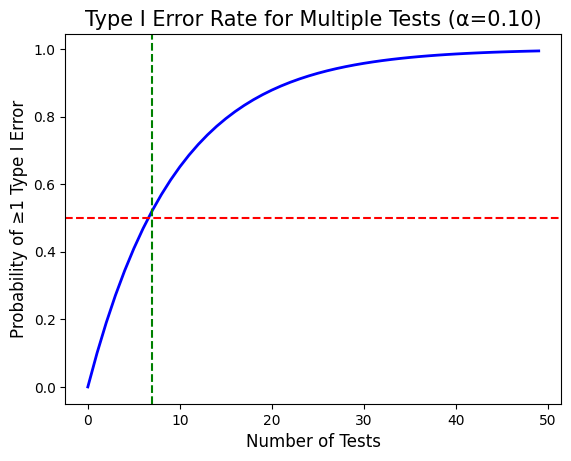

In [35]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Estimate the number of tests needed for ~50% chance of ≥1 Type I error
# With sig_threshold = 0.1, the crossover point is about 7 tests
num_tests_50percent = 7
print("Approx number of tests for 50% error probability:", num_tests_50percent)

# Step 2: Define parameters for simulation
sig_threshold = 0.1  # significance level (10%)
num_tests = np.array(range(50))  # number of tests from 0 to 49

# Step 3: Calculate probability of at least one false positive
# Formula: 1 - (1 - α)^k, where α = significance threshold, k = number of tests
probabilities = 1 - ((1 - sig_threshold) ** num_tests)

# Step 4: Plot the curve
plt.plot(num_tests, probabilities, color="blue", linewidth=2)
plt.axhline(0.5, color="red", linestyle="dashed")  # horizontal line at 50%
plt.axvline(num_tests_50percent, color="green", linestyle="dashed")  # vertical line at crossover

# Add title and labels
plt.title('Type I Error Rate for Multiple Tests (α=0.10)', fontsize=15)
plt.ylabel('Probability of ≥1 Type I Error', fontsize=12)
plt.xlabel('Number of Tests', fontsize=12)

# Show plot
plt.show()
